# 01 Random agent baseline

#### 👉Before you try to solve a Reinforcement Learning problem you should get a grasp of its difficulty.

#### 👉 To do so, you need to design a dummy agent that can peform the task without much brains, and evaluate its performance.

#### 👉A simple way to do so is by using a Random Agent, that chooses its next action randomly, without paying attention at the current state of the environment.

In [ ]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [ ]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
env = gym.make('MountainCar-v0', render_mode="rgb_array")
state = env.reset()

while True:
    env.render()
    state, reward, terminated, truncated, _ = env.step(env.action_space.sample())
    done = terminated or truncated
    if done:
        break

env.close()
env._max_episode_steps = 1000

## Random agent 🤖🍷

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CAS_AML_RL/hands_on/02_mountain_car/notebooks/')  # Add the parent directory to the path

Mounted at /content/drive


In [ ]:
from src.random_agent import RandomAgent
agent = RandomAgent(env)

from src.loops import evaluate
n_episodes = 1000

rewards, max_positions = evaluate(agent, env, n_episodes)

## And the success rate is... bad...

In [ ]:
n_completed = sum([1 if m > 0.5 else 0 for m in max_positions])
print(f'{n_completed} success out of {n_episodes} attempts')

0 success out of 1000 attempts


## Let's see how far we got in each attempt

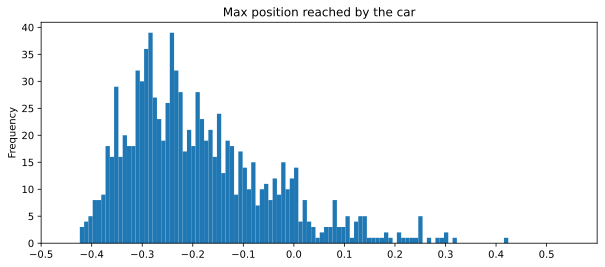

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Max position reached by the car")
ax.set(xlim=(-0.5, 0.6), xticks=np.arange(-0.5, 0.6, 0.1))
pd.Series(max_positions).plot(kind='hist', bins=100)

plt.show()